# Lista de Exercícios IX

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 27/11/2020

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib notebook

## Problema 1

### Letra a)

Como de costume, definimos uma função para melhorar um pouco a estética dos plots que iremos realizar ao longo deste `Notebook`:

In [2]:
def opt_plot():
    plt.grid()
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Vamos resolver a equação 

$$\frac{dV_{\text{out}}}{dt}=V'_{\text{out}}=\frac{1}{RC}(V_{\text{in}}-V_{\text{out}})$$

usando o método de Runge-Kutta de 4ª ordem.

Primeiramente vamos definir algumas constantes:

In [3]:
V_out_0 = 0
t_initial = 0
t_final = 10

N = 5000  
h = (t_final - t_initial) / N  

Agora vamos definir uam função chamada `V_in(t)` que irá retornar $1$ se o a função piso de $2t$ for da forma $2k$ e $-1$ se a função piso de $2t$ for da forma $2k-1$, com $k\in\mathbb{N}$.

**OBS:** Para o autor deste `Notebook`, o número zero não é natural, ou seja, $0\notin\mathbb{N}$.

In [4]:
def V_in(t):
    if np.floor(2 * t) % 2 == 0:
        return 1
    else:
        return -1

Definimos a nossa função principail:

In [5]:
def f(V, t, RC):
    return 1 / RC * (V_in(t) - V)

Por fim, implementamos o método de Runge-Kutta de 4ª ordem:

In [6]:
def g(RC):
    tpoints = np.arange(t_initial, t_final, h)
    Vpoints = []
    V = V_out_0
    
    for t in tpoints:
        Vpoints.append(V)
        k1 = h * f(V, t, RC)
        k2 = h * f(V + 0.5 * k1, t + 0.5 * h, RC)
        k3 = h * f(V + 0.5 * k2, t + 0.5 * h, RC)
        k4 = h * f(V + k3, t + h, RC)
        V +=  (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return Vpoints

Definimos os valores que usaremos no eixo x:

In [7]:
t = np.arange(t_initial, t_final, h)

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


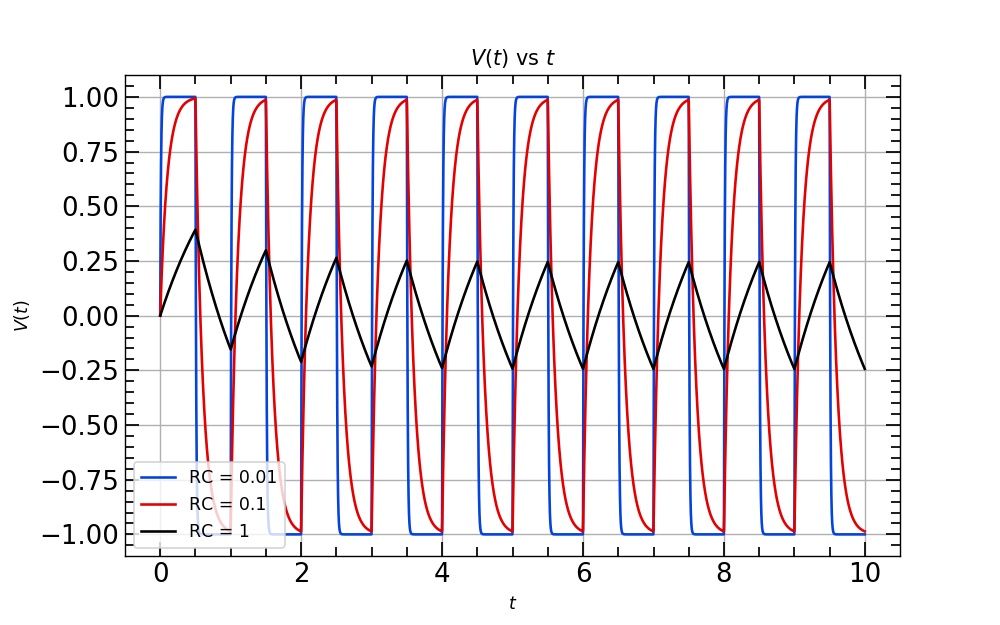

In [8]:
plt.figure(figsize=(8,5))

plt.plot(t, g(0.01), color='xkcd:blue', label='RC = 0.01')
plt.plot(t, g(0.1), color='xkcd:red', label='RC = 0.1')
plt.plot(t, g(1), color='xkcd:black', label='RC = 1')
plt.title(r'$V(t)$ vs $t$')
plt.xlabel(r'$t$')
plt.ylabel(r'$V(t)$')
plt.legend(loc='best')
opt_plot()

### Letra b)

Quando um circuito RC em série é alimentado com uma voltagem alternada de frequência angular $\omega$ e amplitude $V_{0}$, as amplitudes das voltagens no capacitor ($V_{0C}$) e no resistor ($V_{0R}$) passam a valer:

$$V_{0C}=\frac{X_{C}}{Z}V_{0}=\frac{1}{\sqrt{1+(\omega RC)^{2}}}V_{0}$$

$$V_{0R}=\frac{R}{Z}V_{0}=\frac{\omega RC}{\sqrt{1+(\omega RC)^{2}}}V_{0}$$

Para frequências baixas a amplitude $V_{0R}$ é baixa. Esta amplitude aumenta com o aumento da frequência, e no limite de frequências muito altas, $V_{0R}\rightarrow V_{0}$. Assim, de acordo com a faixa de frequências que se deseja eliminar (ou filtrar) do sinal de entrada, escolhe-se o dispositivo onde o sinal de saída será extraído assim como se pode notar no gráfico presente na **letra a)**. 

Num filtro passa-baixa, as frequências altas são eliminadas utilizando o sinal de tensão no capacitor como saída. Dessa forma, se uma carga for ligada em paralelo com o capacitor os sinais de alta frequência passarão pelo capacitor e os de baixa frequência passarão pela carga, caracterizando assim um filtro passa-baixa. Em resumo, neste tipo de circuito permite a passagem de baixas frequências sem dificuldade e reduz a amplitude das frequências maiores que a frequência de corte dada por:

$$f_{\text{corte}}=\frac{1}{2\pi RC}$$

$\text{ }$

## Problema 2

### Letra a)

Vamos começar definindo as constantes que serão usadas na resolução do problema.

Primeiramente, vamos definir as constantes $\alpha, \beta, \gamma$ e $\delta$ fornecidas no enunciado:

In [9]:
alpha = 1.
beta = 0.5
gamma = 0.5
delta = 2.

Agora definimos as condições iniciais para $x$ e $y$:

In [10]:
x_initial = 2 
y_initial = 2 

Por fim, definimos os tempos inicial e final, respectivamente, o número de pontos e o nosso $h$:

In [11]:
t_start = 0
t_end = 30
N = 10000 
h = (t_end - t_start) / N

Vamos definir uma função `f(r,t)` como sugerido que incluir $\frac{dx}{dt}$ e $\frac{dy}{dt}$:

In [12]:
def f(r, t):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    
    return np.array([fx, fy], float)

Agora definimos o nosso intervalo de pontos `t` e os conjuntos vazios para anexar pontos de $x$ e $y$:

In [13]:
t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []

Configuramos o nosso array `r`:

In [14]:
r = np.array([x_initial, y_initial], float)

Agora realizamos um loop usando o método de Runge-Kutta de 4ª ordem:

In [15]:
for t in t_points:
    x_points.append(r[0])
    y_points.append(r[1])
    
    k1 = h * f(r,t)
    k2 = h * f(r + 0.5*k1, t + 0.5*h)
    k3 = h * f(r + 0.5*k2, t + 0.5*h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6

Por fim, vamos plotar os pontos $x$ e $y$ em função dos pontos de $t$:

<IPython.core.display.Javascript object>


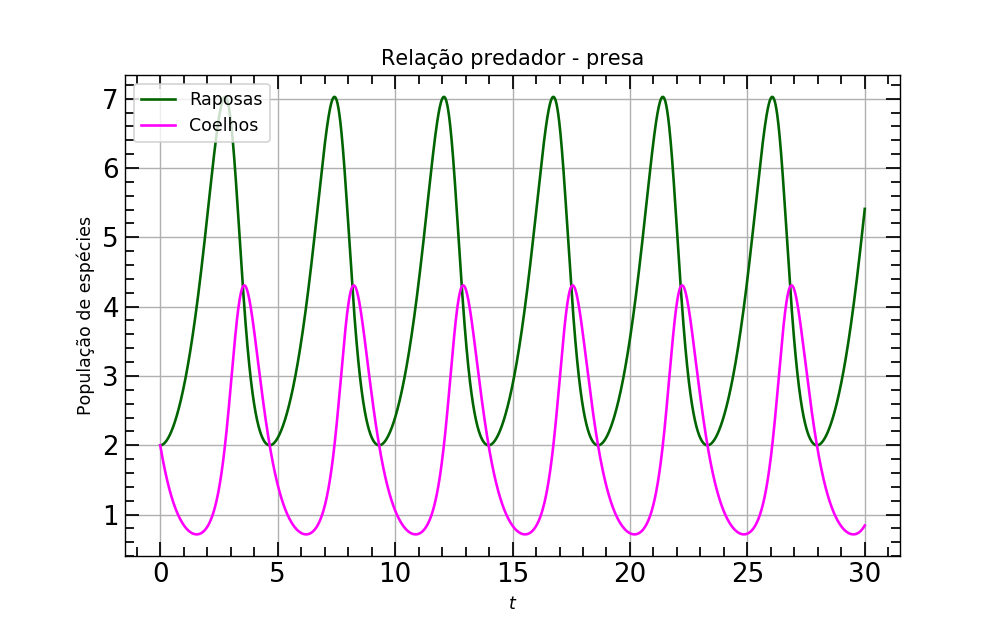

In [16]:
plt.figure(figsize=(8,5))

plt.plot(t_points, x_points, '-', color='darkgreen', label='Raposas')
plt.plot(t_points, y_points, '-', color='fuchsia', label='Coelhos')
plt.title('Relação predador - presa')
plt.xlabel('$t$')
plt.ylabel('População de espécies')
plt.legend(loc='best')
opt_plot()

### Letra b)

À medida que o número de raposas (ou seja, os pontos de $x$) aumentam, o número de coelhos (ou seja, os pontos de $y$) diminui, ou seja, os predadores (raposas) estão se alimentando de suas presas (coelhos). 

Note que as raposas atingem sua população máxima quando os coelhos estão em sua população mínima. Então, conforme a população de raposas começa a diminuir, o número de coelhos começa a aumentar. Portanto, a tendência recomeça.

Mais coelhos significa mais presas para as raposas se alimentarem. Quando a população de coelhos atinge seu valor mínimo as raposas começam a morrer de fome ou por conta de disputas por comida (dependendo da espécie, a população de predadores podem começar a diminuir até por conta de canibalismo). Dessa forma, a população de raposas diminui e, consequentemente, a de coelhos aumenta e então o ciclo se repete.

$\text{ }$

## Problema 3

Analogamente ao problema anterior, começamos definindo uma série de constantes que usaremos neste problema.

Começando definindo as constantes $\sigma$, $r$ e $b$. 

In [17]:
sigma = 10
r = 28
b = 8./3.

Agora definimos as condições iniciais para $x$, $y$ e $z$:

In [18]:
x_initial = 0
y_initial = 1
z_initial = 0

Por fim, definimos os tempos inicial e final, respectivamente, o número de pontos e o nosso ℎ:

In [19]:
t_start = 0
t_end = 50
N = 1000
h = (t_end - t_start) / N

Vamos definir a função `f(w,t)` como sugerido que inclua $\frac{dx}{dt}$, $\frac{dy}{dt}$ e $\frac{dz}{dt}$:

In [20]:
def f(w,t):
    x = w[0]
    y = w[1]
    z = w[2]
    fx = sigma * (y - x)
    fy = r*x - y - x*z
    fz = x*y - b*z
    
    return np.array([fx, fy, fz], float)

Agora definimos o nosso intervalo de pontos t e os conjuntos vazios para anexar pontos de $𝑥$, $𝑦$ e $z$:

In [21]:
t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []
z_points = []

Definimos o nosso vetor `w`:

In [22]:
w = np.array([x_initial, y_initial, z_initial], float)

Agora realizamos um loop usando o método de Runge-Kutta de 4ª ordem:

In [23]:
for t in t_points:
    x_points.append(w[0])
    y_points.append(w[1])
    z_points.append(w[2])
    
    k1 = h * f(w,t)
    k2 = h * f(w + 0.5*k1, t + 0.5*h)
    k3 = h * f(w + 0.5*k2, t + 0.5*h)
    k4 = h * f(w + k3, t + h)
    w += (k1 + 2*k2 + 2*k3 + k4) / 6

Por fim, plotamos $y$ em função do tempo:

<IPython.core.display.Javascript object>


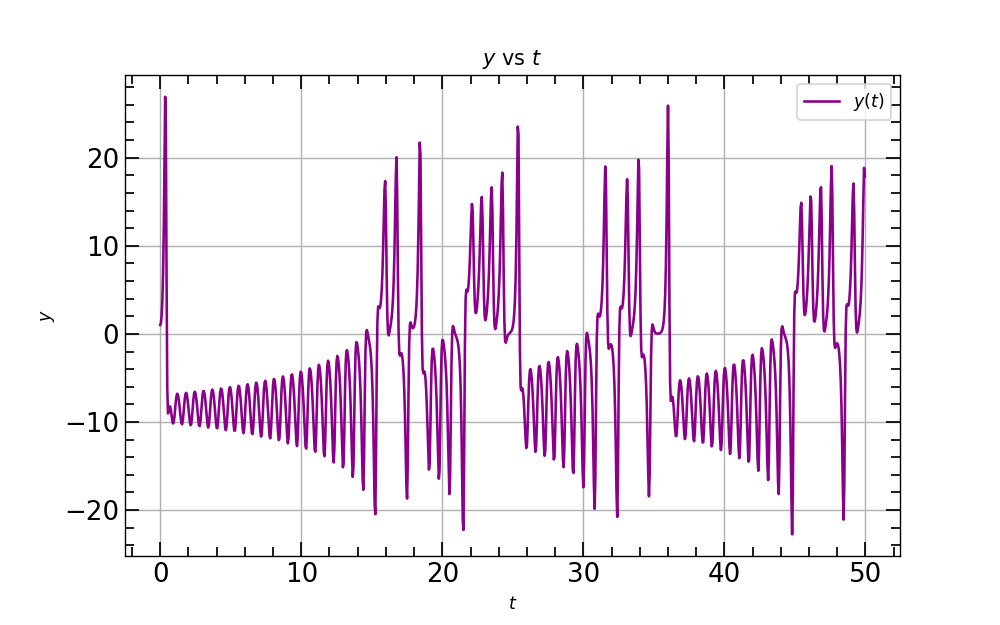

In [24]:
plt.figure(figsize=(8,5))

plt.plot(t_points, y_points, '-', color='darkmagenta', label=r'$y(t)$')
plt.title(r'$y$ vs $t$')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.legend(loc='best')
opt_plot()

### Letra b)

Agora vamos plotar $z$ em função do tempo $t$:

<IPython.core.display.Javascript object>


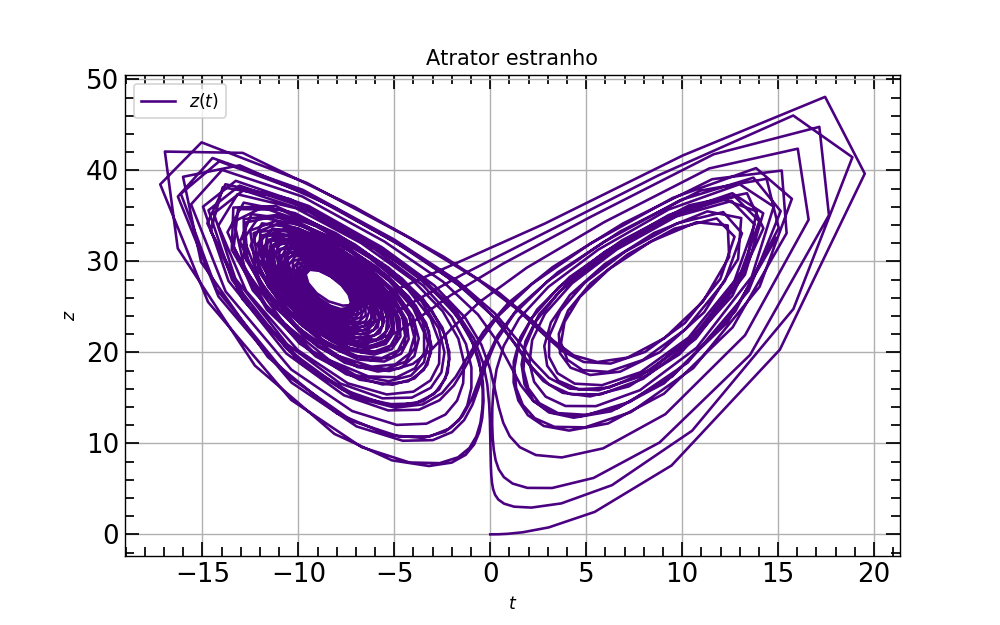

In [25]:
plt.figure(figsize=(8,5))

plt.plot(x_points, z_points, '-', color='indigo' , label=r'$z(t)$')
plt.title('Atrator estranho')
plt.xlabel(r'$t$')
plt.ylabel(r'$z$')
plt.legend(loc='best')
opt_plot()

$\text{ }$

### Problema 4

Vamos começar definindo as constantes $g$ e $l$:

In [26]:
g = 9.81
l = 0.1

Por fim, definimos o ínicio e o fim do intervalo, o número de passos e o tamanho do passo, respectivamente:

In [27]:
a = 0       
b = 10      
N = 500    
h = (b-a)/N 

Agora definimos a nossa função principal `f(r,t)`:

In [28]:
def f(r,t):
    theta = r[0]                    
    omega = r[1]                    
    ftheta = omega
    fomega = -(g/l)*np.sin(theta)
    
    return np.array([ftheta,fomega],float) 

Agora definimos o nosso intervalo de pontos t e os conjuntos vazios para anexar pontos de $\theta$ (ou seja, $x$) e $\omega$ (ou seja, $y$):

In [29]:
tpoints = np.arange(a,b,h)
thetapoints = []   
omegapoints = []   

Definimos o nosso array `r`:

In [30]:
r = np.array([179*np.pi/180,0.0],float)

Agora realizamos um loop usando o método de Runge-Kutta de 4ª ordem:

In [31]:
for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1]) 
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    x = l * np.sin(r[0])
    y = -l * np.cos(r[0])

Agora vamos plotar $\theta$ em função do tempo:

<IPython.core.display.Javascript object>


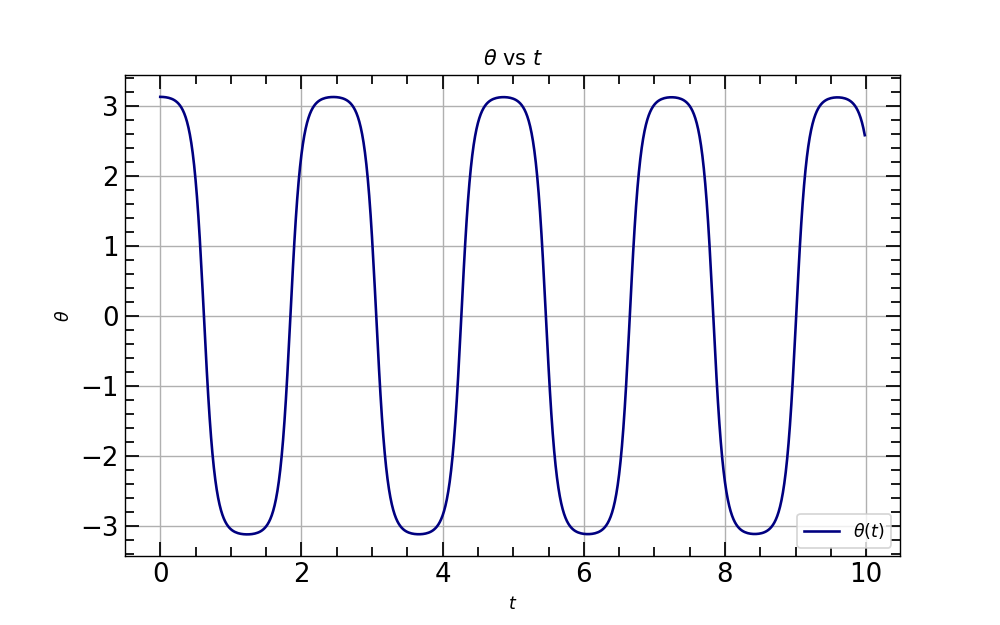

In [32]:
plt.figure(figsize=(8,5))

plt.plot(tpoints,thetapoints, '-', color='navy' , label=r'$\theta(t)$')
plt.title(r'$\theta$ vs $t$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(loc='best')
opt_plot()

Agora vamos plotar $\omega$ em função do tempo:

<IPython.core.display.Javascript object>


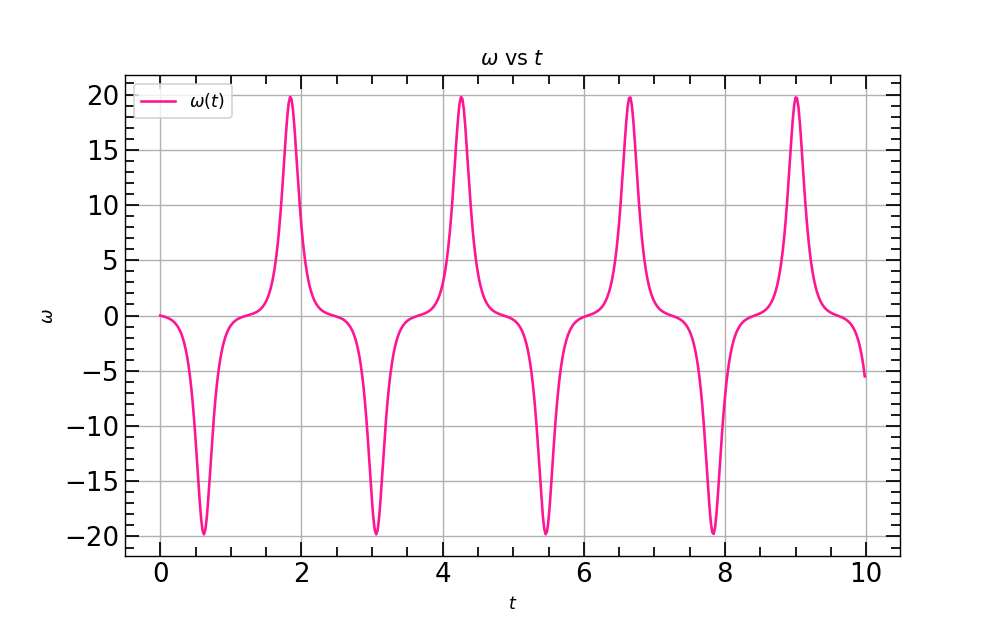

In [33]:
plt.figure(figsize=(8,5))

plt.plot(tpoints,omegapoints, '-', color='deeppink' , label=r'$\omega(t)$')
plt.title(r'$\omega$ vs $t$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\omega$')
plt.legend(loc='best')
opt_plot()

$\text{ }$